In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import cross_validate
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

In [2]:
# Read each CSV file
train_df = pd.read_csv(os.path.join('../Data', "train_data.csv"))
undersampled_train_df = pd.read_csv(os.path.join('../Data', "undersampled_train_data.csv"))
oversampled_train_df = pd.read_csv(os.path.join('../Data', "oversampled_train_data.csv"))
extracted_features_train_df = pd.read_csv(os.path.join('../Data', "extracted_features_train_data.csv"))
extracted_features_undersampled_train_df = pd.read_csv(os.path.join('../Data', "extracted_features_undersampled_train_data.csv"))
extracted_features_oversampled_train_df = pd.read_csv(os.path.join('../Data', "extracted_features_oversampled_train_data.csv"))
test_df = pd.read_csv(os.path.join('../Data', "test_data.csv"))

In [3]:
N_SPLITS = 5

# Apply on the original data

In [4]:
X_train = train_df.drop('Class', axis=1).values
y_train = train_df['Class'].values

log_reg_params = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

grid_log_reg = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = log_reg_params, 
                        scoring= 'roc_auc', 
                        cv = N_SPLITS, 
                        verbose = 1,
                        return_train_score=True) 

grid_log_reg.fit(X_train, y_train)

#! We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

print("Best Estimator: ", log_reg)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Estimator:  LogisticRegression(C=0.001)


In [5]:
# results of grid search CV
cv_results = pd.DataFrame(grid_log_reg.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.480640,0.069679,0.022959,0.001798,0.0001,{'C': 0.0001},0.964712,0.988420,0.988743,0.975482,...,0.981742,0.010151,3,0.987098,0.981268,0.981185,0.983705,0.980070,0.982665,0.002514
1,0.639235,0.200452,0.037292,0.024057,0.0010,{'C': 0.001},0.971825,0.991185,0.989601,0.976483,...,0.984059,0.008241,1,0.988279,0.983652,0.983332,0.986380,0.983175,0.984964,0.002029
2,0.718104,0.061616,0.024353,0.003427,0.0100,{'C': 0.01},0.976730,0.988515,0.984082,0.978133,...,0.983625,0.005503,2,0.988071,0.984988,0.984648,0.986641,0.984667,0.985803,0.001352
3,0.712110,0.184466,0.019281,0.008368,0.1000,{'C': 0.1},0.975737,0.983999,0.972967,0.979281,...,0.980754,0.006636,4,0.987108,0.982484,0.981533,0.983824,0.983112,0.983612,0.001903
4,0.637141,0.061412,0.014357,0.003341,1.0000,{'C': 1},0.972309,0.982671,0.970359,0.978197,...,0.978978,0.007566,5,0.986209,0.980825,0.979927,0.982738,0.982075,0.982355,0.002159
5,0.670938,0.103470,0.015015,0.003368,10.0000,{'C': 10},0.972897,0.983759,0.968007,0.978025,...,0.978794,0.008152,6,0.986207,0.981219,0.979317,0.981986,0.982084,0.982162,0.002253
6,0.736821,0.076834,0.025759,0.016453,100.0000,{'C': 100},0.973020,0.982206,0.967006,0.978158,...,0.978367,0.008288,7,0.986274,0.980584,0.979048,0.982321,0.981523,0.981950,0.002421


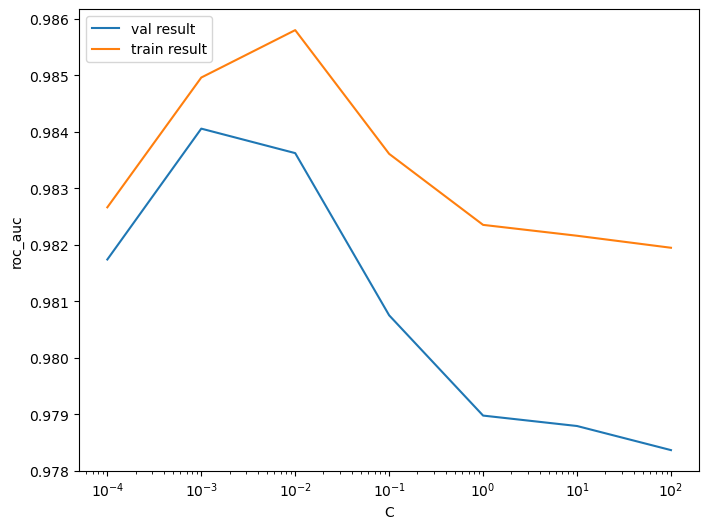

In [6]:
# plot of C versus train and validation scores
plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['val result', 'train result'], loc='upper left')
plt.xscale('log')

In [7]:
# Best score with best C
best_score = grid_log_reg.best_score_
best_C = grid_log_reg.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9840588977904146 at C = 0.001


In [8]:
logreg = LogisticRegression(C=best_C)
original_best_logistic_model = logreg.fit(X_train, y_train)
y_train_pred = original_best_logistic_model.predict(X_train)

In [9]:
confusion = confusion_matrix(y_train, y_train_pred)
print(confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

[[227424     27]
 [   182    212]]


In [10]:
# Sensitivity
print("Sensitivity(Recall):", recall_score(y_train, y_train_pred))

# Percision
print("Percision:", precision_score(y_train, y_train_pred))

# F1 score
print("F1-Score:", f1_score(y_train, y_train_pred))

# Accuracy
print("Accuracy:", accuracy_score(y_train, y_train_pred))

# Specificity
print("Specificity:", TN / float(TN+FP))

# classification_report
print(classification_report(y_train, y_train_pred))

Sensitivity(Recall): 0.5380710659898477
Percision: 0.8870292887029289
F1-Score: 0.669826224328594
Accuracy: 0.9990827097368825
Specificity: 0.9998812931136817
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.89      0.54      0.67       394

    accuracy                           1.00    227845
   macro avg       0.94      0.77      0.83    227845
weighted avg       1.00      1.00      1.00    227845



In [11]:
# ROC Curve function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

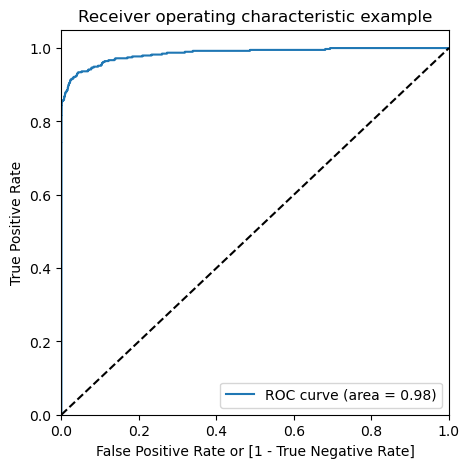

In [12]:
# Predicted probability
y_train_pred_proba = original_best_logistic_model.predict_proba(X_train)[:,1]
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

In [13]:
# Define scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

# Perform cross-validation
cv_results = cross_validate(original_best_logistic_model, X_train, y_train, cv=N_SPLITS, scoring=scoring)

# Display average of each metric
for metric, scores in cv_results.items():
    if "test" in metric:
        print(f"{metric}: {scores.mean():.4f}")

test_accuracy: 0.9990
test_precision: 0.8790
test_recall: 0.5202
test_f1: 0.6533
test_roc_auc: 0.9841


### Consider the most important features only (V3, V4, V7, V10, V12,V14, V16, V17, V18) from the original data

In [14]:
X_train = extracted_features_train_df.drop('Class', axis=1).values
y_train = extracted_features_train_df['Class'].values

log_reg_params = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

grid_log_reg = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = log_reg_params, 
                        scoring= 'roc_auc', 
                        cv = N_SPLITS, 
                        verbose = 1,
                        return_train_score=True) 

grid_log_reg.fit(X_train, y_train)

#! We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

print("Best Estimator: ", log_reg)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Estimator:  LogisticRegression(C=0.01)


In [15]:
# results of grid search CV
cv_results = pd.DataFrame(grid_log_reg.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.276385,0.059243,0.020067,0.005387,0.0001,{'C': 0.0001},0.962818,0.991214,0.971114,0.956559,...,0.972927,0.012711,7,0.975360,0.968508,0.973905,0.977515,0.970262,0.973110,0.003298
1,0.217549,0.012020,0.020095,0.001894,0.0010,{'C': 0.001},0.968382,0.992002,0.975485,0.963631,...,0.976994,0.010508,6,0.979452,0.974223,0.978241,0.981010,0.975713,0.977728,0.002464
2,0.208282,0.020943,0.019587,0.006470,0.0100,{'C': 0.01},0.973419,0.990676,0.972467,0.969301,...,0.977478,0.007733,1,0.980126,0.975668,0.979576,0.981192,0.977151,0.978743,0.002030
3,0.275110,0.048731,0.020908,0.005101,0.1000,{'C': 0.1},0.973780,0.989591,0.971625,0.972044,...,0.977370,0.006776,2,0.979607,0.975584,0.979538,0.980401,0.977697,0.978565,0.001735
4,0.237600,0.029823,0.019019,0.005569,1.0000,{'C': 1},0.973761,0.989255,0.971412,0.972293,...,0.977212,0.006623,3,0.979607,0.976015,0.979436,0.980218,0.977630,0.978581,0.001546
5,0.198288,0.014792,0.017528,0.002830,10.0000,{'C': 10},0.973759,0.989207,0.971388,0.972312,...,0.977191,0.006604,4,0.979609,0.976033,0.979421,0.980197,0.977623,0.978576,0.001535
6,0.178156,0.014100,0.013976,0.003857,100.0000,{'C': 100},0.973761,0.989201,0.971385,0.972316,...,0.977190,0.006601,5,0.979610,0.976034,0.979419,0.980195,0.977622,0.978576,0.001534


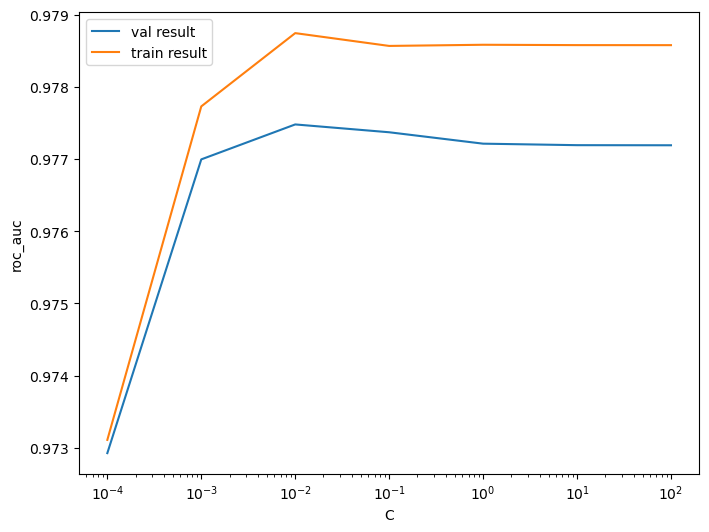

In [16]:
# plot of C versus train and validation scores
plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['val result', 'train result'], loc='upper left')
plt.xscale('log')

In [17]:
logreg = LogisticRegression(C=best_C)
original_best_logistic_model_v2 = logreg.fit(X_train, y_train)
y_train_pred = original_best_logistic_model_v2.predict(X_train)

In [18]:
confusion = confusion_matrix(y_train, y_train_pred)
print(confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

[[221542      0]
 [   150    244]]


In [19]:
# Best score with best C
best_score = grid_log_reg.best_score_
best_C = grid_log_reg.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9774781182281617 at C = 0.01


In [20]:
# Sensitivity
print("Sensitivity(Recall):", recall_score(y_train, y_train_pred))

# Percision
print("Percision:", precision_score(y_train, y_train_pred))

# F1 score
print("F1-Score:", f1_score(y_train, y_train_pred))

# Accuracy
print("Accuracy:", accuracy_score(y_train, y_train_pred))

# Specificity
print("Specificity:", TN / float(TN+FP))

# classification_report
print(classification_report(y_train, y_train_pred))

Sensitivity(Recall): 0.6192893401015228
Percision: 1.0
F1-Score: 0.7648902821316614
Accuracy: 0.9993241294787687
Specificity: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    221542
           1       1.00      0.62      0.76       394

    accuracy                           1.00    221936
   macro avg       1.00      0.81      0.88    221936
weighted avg       1.00      1.00      1.00    221936



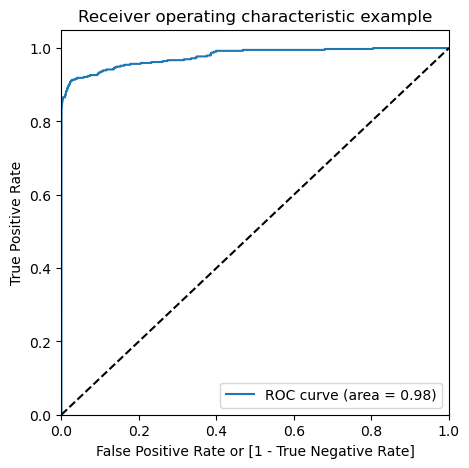

In [21]:
# Predicted probability
y_train_pred_proba = original_best_logistic_model_v2.predict_proba(X_train)[:,1]
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

In [22]:
# Define scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

# Perform cross-validation
cv_results = cross_validate(original_best_logistic_model_v2, X_train, y_train, cv=N_SPLITS, scoring=scoring)

# Display average of each metric
for metric, scores in cv_results.items():
    if "test" in metric:
        print(f"{metric}: {scores.mean():.4f}")

test_accuracy: 0.9993
test_precision: 0.9956
test_recall: 0.6015
test_f1: 0.7493
test_roc_auc: 0.9770


# Apply on the under-sampled data

In [23]:
X_train = undersampled_train_df.drop('Class', axis=1).values
y_train = undersampled_train_df['Class'].values

log_reg_params = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

grid_log_reg = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = log_reg_params, 
                        scoring= 'roc_auc', 
                        cv = N_SPLITS, 
                        verbose = 1,
                        return_train_score=True) 

grid_log_reg.fit(X_train, y_train)

#! We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

print("Best Estimator: ", log_reg)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Estimator:  LogisticRegression(C=0.01)


c:\Users\Smart\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Smart\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [24]:
# results of grid search CV
cv_results = pd.DataFrame(grid_log_reg.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.018152,0.015888,0.016651,0.024875,0.0001,{'C': 0.0001},0.965230,0.988303,0.987502,0.980688,...,0.982754,0.009498,4,0.987644,0.982011,0.982222,0.983926,0.981987,0.983558,0.002167
1,0.005197,0.003088,0.003431,0.002729,0.0010,{'C': 0.001},0.967473,0.988784,0.989745,0.984907,...,0.984949,0.009187,2,0.989569,0.984056,0.984691,0.986478,0.984448,0.985849,0.002037
2,0.004949,0.005130,0.003109,0.001950,0.0100,{'C': 0.01},0.967313,0.989585,0.990707,0.984096,...,0.985139,0.009466,1,0.990768,0.986727,0.986425,0.988135,0.986277,0.987667,0.001685
3,0.008345,0.001064,0.001306,0.000882,0.1000,{'C': 0.1},0.965711,0.989104,0.990226,0.981986,...,0.983588,0.009490,3,0.992401,0.988450,0.987876,0.990054,0.988065,0.989369,0.001699
4,0.015514,0.004269,0.002454,0.001391,1.0000,{'C': 1},0.957379,0.988143,0.989585,0.979552,...,0.980725,0.012230,5,0.994094,0.989982,0.989519,0.991380,0.989381,0.990871,0.001760
5,0.014998,0.004195,0.004121,0.002883,10.0000,{'C': 10},0.946964,0.986220,0.987822,0.977929,...,0.977775,0.015935,6,0.994800,0.991192,0.990899,0.992315,0.990486,0.991938,0.001554
6,0.025397,0.011214,0.003388,0.002206,100.0000,{'C': 100},0.946002,0.983977,0.977568,0.978092,...,0.975213,0.015332,7,0.995001,0.991585,0.991706,0.992445,0.990918,0.992331,0.001420


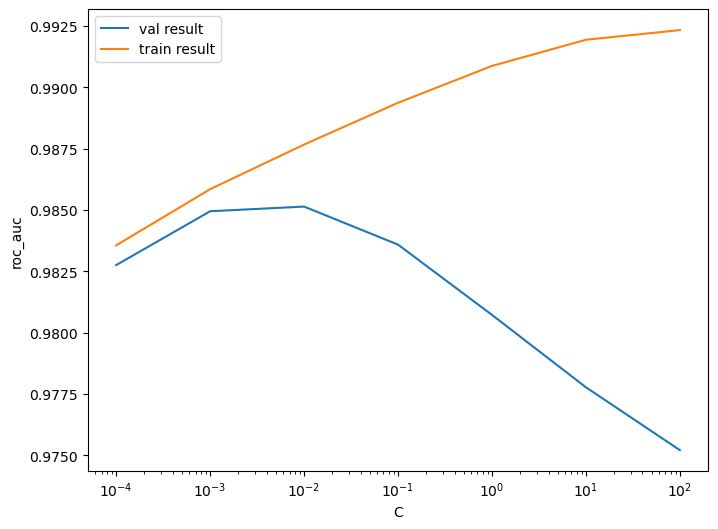

In [25]:
# plot of C versus train and validation scores
plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['val result', 'train result'], loc='upper left')
plt.xscale('log')

In [26]:
# Best score with best C
best_score = grid_log_reg.best_score_
best_C = grid_log_reg.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9851392158554473 at C = 0.01


In [27]:
logreg = LogisticRegression(C=best_C)
undersampled_best_logistic_model = logreg.fit(X_train, y_train)
y_train_pred = undersampled_best_logistic_model.predict(X_train)

In [28]:
confusion = confusion_matrix(y_train, y_train_pred)
print(confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

[[391   3]
 [ 41 353]]


In [29]:
# Sensitivity
print("Sensitivity(Recall):", recall_score(y_train, y_train_pred))

# Percision
print("Percision:", precision_score(y_train, y_train_pred))

# F1 score
print("F1-Score:", f1_score(y_train, y_train_pred))

# Accuracy
print("Accuracy:", accuracy_score(y_train, y_train_pred))

# Specificity
print("Specificity:", TN / float(TN+FP))

# classification_report
print(classification_report(y_train, y_train_pred))

Sensitivity(Recall): 0.8959390862944162
Percision: 0.9915730337078652
F1-Score: 0.9413333333333334
Accuracy: 0.9441624365482234
Specificity: 0.9923857868020305
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       394
           1       0.99      0.90      0.94       394

    accuracy                           0.94       788
   macro avg       0.95      0.94      0.94       788
weighted avg       0.95      0.94      0.94       788



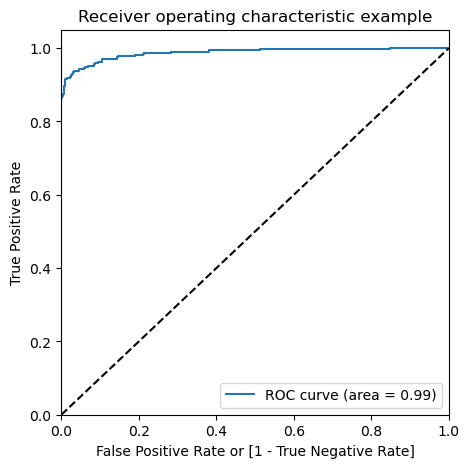

In [30]:
# Predicted probability
y_train_pred_proba = undersampled_best_logistic_model.predict_proba(X_train)[:,1]
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

In [31]:
# Define scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

# Perform cross-validation
cv_results = cross_validate(undersampled_best_logistic_model, X_train, y_train, cv=N_SPLITS, scoring=scoring)

# Display average of each metric
for metric, scores in cv_results.items():
    if "test" in metric:
        print(f"{metric}: {scores.mean():.4f}")

test_accuracy: 0.9353
test_precision: 0.9887
test_recall: 0.8807
test_f1: 0.9311
test_roc_auc: 0.9851


### Consider the most important features only (V3, V4, V7, V10, V12,V14, V16, V17, V18) from the undresampled data

In [32]:
X_train = extracted_features_undersampled_train_df.drop('Class', axis=1).values
y_train = extracted_features_undersampled_train_df['Class'].values

log_reg_params = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

grid_log_reg = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = log_reg_params, 
                        scoring= 'roc_auc', 
                        cv = N_SPLITS, 
                        verbose = 1,
                        return_train_score=True) 

grid_log_reg.fit(X_train, y_train)

#! We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

print("Best Estimator: ", log_reg)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Estimator:  LogisticRegression(C=0.01)


In [33]:
# results of grid search CV
cv_results = pd.DataFrame(grid_log_reg.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.009312,0.006333,0.001702,0.001412,0.0001,{'C': 0.0001},0.955614,0.994411,0.977478,0.965035,...,0.974743,0.013386,7,0.979774,0.969867,0.976444,0.978209,0.974273,0.975713,0.003450
1,0.002634,0.002015,0.004899,0.002259,0.0010,{'C': 0.001},0.962025,0.995397,0.980273,0.971362,...,0.978780,0.011409,6,0.983548,0.975854,0.980818,0.982301,0.979458,0.980396,0.002655
2,0.005765,0.001405,0.002786,0.002760,0.0100,{'C': 0.01},0.964327,0.994575,0.979615,0.976024,...,0.980210,0.010161,1,0.985327,0.978853,0.982597,0.983487,0.981200,0.982293,0.002179
3,0.004720,0.004283,0.001042,0.001754,0.1000,{'C': 0.1},0.963505,0.992931,0.979615,0.978854,...,0.980016,0.009670,2,0.985740,0.980115,0.983713,0.983394,0.981942,0.982981,0.001877
4,0.005919,0.003714,0.002012,0.002464,1.0000,{'C': 1},0.963505,0.989972,0.979122,0.979354,...,0.979226,0.008800,3,0.986112,0.980621,0.983962,0.983064,0.981643,0.983080,0.001902
5,0.003845,0.002176,0.001005,0.002009,10.0000,{'C': 10},0.963834,0.989972,0.978136,0.979520,...,0.979128,0.008696,4,0.986268,0.980322,0.983993,0.983023,0.981581,0.983037,0.002042
6,0.005128,0.004181,0.003274,0.002646,100.0000,{'C': 100},0.963340,0.989808,0.977807,0.979520,...,0.978931,0.008837,5,0.986278,0.980311,0.983962,0.983002,0.981571,0.983025,0.002046


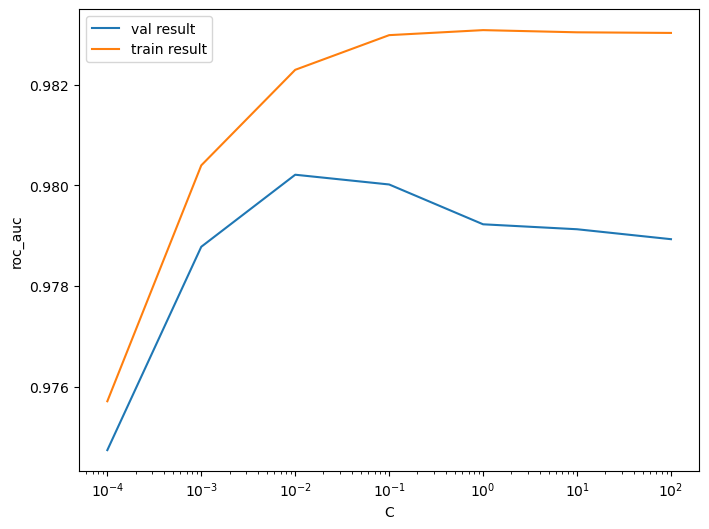

In [34]:
# plot of C versus train and validation scores
plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['val result', 'train result'], loc='upper left')
plt.xscale('log')

In [35]:
logreg = LogisticRegression(C=best_C)
undersampled_best_logistic_model_v2 = logreg.fit(X_train, y_train)
y_train_pred = undersampled_best_logistic_model_v2.predict(X_train)

In [36]:
confusion = confusion_matrix(y_train, y_train_pred)
print(confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

[[381   3]
 [ 47 347]]


In [37]:
# Best score with best C
best_score = grid_log_reg.best_score_
best_C = grid_log_reg.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9802100298102963 at C = 0.01


In [38]:
# Sensitivity
print("Sensitivity(Recall):", recall_score(y_train, y_train_pred))

# Percision
print("Percision:", precision_score(y_train, y_train_pred))

# F1 score
print("F1-Score:", f1_score(y_train, y_train_pred))

# Accuracy
print("Accuracy:", accuracy_score(y_train, y_train_pred))

# Specificity
print("Specificity:", TN / float(TN+FP))

# classification_report
print(classification_report(y_train, y_train_pred))

Sensitivity(Recall): 0.8807106598984772
Percision: 0.9914285714285714
F1-Score: 0.9327956989247311
Accuracy: 0.9357326478149101
Specificity: 0.9921875
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       384
           1       0.99      0.88      0.93       394

    accuracy                           0.94       778
   macro avg       0.94      0.94      0.94       778
weighted avg       0.94      0.94      0.94       778



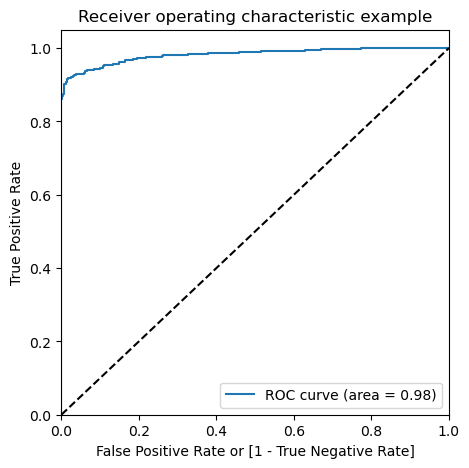

In [39]:
# Predicted probability
y_train_pred_proba = undersampled_best_logistic_model_v2.predict_proba(X_train)[:,1]
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

In [40]:
# Define scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

# Perform cross-validation
cv_results = cross_validate(undersampled_best_logistic_model_v2, X_train, y_train, cv=N_SPLITS, scoring=scoring)

# Display average of each metric
for metric, scores in cv_results.items():
    if "test" in metric:
        print(f"{metric}: {scores.mean():.4f}")

test_accuracy: 0.9345
test_precision: 0.9911
test_recall: 0.8782
test_f1: 0.9308
test_roc_auc: 0.9802


# Apply on the over-sampled data

In [41]:
X_train = oversampled_train_df.drop('Class', axis=1).values
y_train = oversampled_train_df['Class'].values

log_reg_params = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

grid_log_reg = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = log_reg_params, 
                        scoring= 'roc_auc', 
                        cv = N_SPLITS, 
                        verbose = 1,
                        return_train_score=True) 

grid_log_reg.fit(X_train, y_train)

#! We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

print("Best Estimator: ", log_reg)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Estimator:  LogisticRegression(C=1)


In [42]:
# results of grid search CV
cv_results = pd.DataFrame(grid_log_reg.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.938806,0.176546,0.058320,0.032058,0.0001,{'C': 0.0001},0.990448,0.989728,0.989761,0.989822,...,0.989916,0.000268,7,0.989830,0.989976,0.989954,0.989946,0.989916,0.989925,0.000051
1,1.086745,0.088857,0.034743,0.007713,0.0010,{'C': 0.001},0.991171,0.990493,0.990513,0.990683,...,0.990682,0.000253,6,0.990615,0.990739,0.990720,0.990712,0.990683,0.990694,0.000043
2,1.676954,0.386452,0.035884,0.003897,0.0100,{'C': 0.01},0.991772,0.991189,0.991189,0.991331,...,0.991338,0.000223,5,0.991274,0.991392,0.991365,0.991388,0.991336,0.991351,0.000043
3,2.050309,0.166716,0.034610,0.006536,0.1000,{'C': 0.1},0.991984,0.991435,0.991413,0.991519,...,0.991560,0.000215,4,0.991495,0.991626,0.991577,0.991593,0.991571,0.991572,0.000043
4,2.207943,0.530730,0.039626,0.011022,1.0000,{'C': 1},0.992010,0.991479,0.991469,0.991543,...,0.991594,0.000210,1,0.991521,0.991667,0.991632,0.991621,0.991591,0.991606,0.000049
5,1.985743,0.407410,0.035624,0.008023,10.0000,{'C': 10},0.992008,0.991470,0.991465,0.991533,...,0.991591,0.000210,3,0.991519,0.991659,0.991629,0.991606,0.991598,0.991602,0.000047
6,1.896803,0.169499,0.045138,0.027279,100.0000,{'C': 100},0.992009,0.991476,0.991464,0.991536,...,0.991592,0.000210,2,0.991520,0.991665,0.991628,0.991611,0.991597,0.991604,0.000048


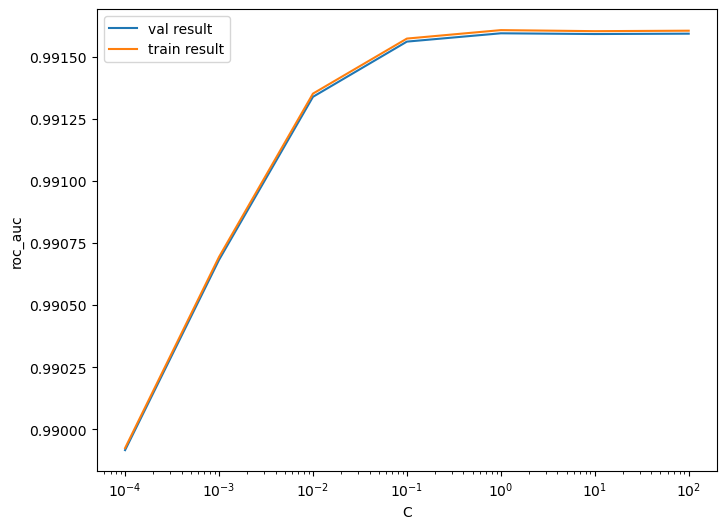

In [43]:
# plot of C versus train and validation scores
plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['val result', 'train result'], loc='upper left')
plt.xscale('log')

In [44]:
# Best score with best C
best_score = grid_log_reg.best_score_
best_C = grid_log_reg.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9915936769487466 at C = 1


In [45]:
logreg = LogisticRegression(C=best_C)
oversampled_best_logistic_model = logreg.fit(X_train, y_train)
y_train_pred = oversampled_best_logistic_model.predict(X_train)

In [46]:
confusion = confusion_matrix(y_train, y_train_pred)
print(confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

[[221765   5686]
 [ 15457 211994]]


In [47]:
# Sensitivity
print("Sensitivity(Recall):", recall_score(y_train, y_train_pred))

# Percision
print("Percision:", precision_score(y_train, y_train_pred))

# F1 score
print("F1-Score:", f1_score(y_train, y_train_pred))

# Accuracy
print("Accuracy:", accuracy_score(y_train, y_train_pred))

# Specificity
print("Specificity:", TN / float(TN+FP))

# classification_report
print(classification_report(y_train, y_train_pred))

Sensitivity(Recall): 0.9320425058584046
Percision: 0.9738790885703785
F1-Score: 0.9525016231176889
Accuracy: 0.9535218574550123
Specificity: 0.9750012090516199
              precision    recall  f1-score   support

           0       0.93      0.98      0.95    227451
           1       0.97      0.93      0.95    227451

    accuracy                           0.95    454902
   macro avg       0.95      0.95      0.95    454902
weighted avg       0.95      0.95      0.95    454902



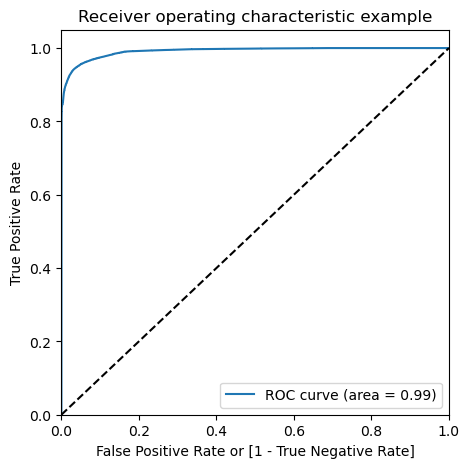

In [48]:
# Predicted probability
y_train_pred_proba = oversampled_best_logistic_model.predict_proba(X_train)[:,1]
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

In [49]:
# Define scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

# Perform cross-validation
cv_results = cross_validate(oversampled_best_logistic_model, X_train, y_train, cv=N_SPLITS, scoring=scoring)

# Display average of each metric
for metric, scores in cv_results.items():
    if "test" in metric:
        print(f"{metric}: {scores.mean():.4f}")

test_accuracy: 0.9536
test_precision: 0.9739
test_recall: 0.9322
test_f1: 0.9526
test_roc_auc: 0.9916


### Consider the most important features only (V3, V4, V7, V10, V12,V14, V16, V17, V18) from the oversampled data

In [50]:
X_train = extracted_features_oversampled_train_df.drop('Class', axis=1).values
y_train = extracted_features_oversampled_train_df['Class'].values

log_reg_params = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

grid_log_reg = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = log_reg_params, 
                        scoring= 'roc_auc', 
                        cv = N_SPLITS, 
                        verbose = 1,
                        return_train_score=True) 

grid_log_reg.fit(X_train, y_train)

#! We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

print("Best Estimator: ", log_reg)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Estimator:  LogisticRegression(C=0.001)


In [51]:
# results of grid search CV
cv_results = pd.DataFrame(grid_log_reg.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.462764,0.084507,0.037980,0.007960,0.0001,{'C': 0.0001},0.986492,0.986050,0.985841,0.985968,...,0.986127,0.000233,7,0.986038,0.986160,0.986204,0.986136,0.986097,0.986127,0.000057
1,0.547152,0.043585,0.043215,0.003573,0.0010,{'C': 0.001},0.986886,0.986342,0.986122,0.986303,...,0.986441,0.000261,1,0.986342,0.986478,0.986514,0.986458,0.986418,0.986442,0.000059
2,0.528717,0.056749,0.040835,0.011005,0.0100,{'C': 0.01},0.986894,0.986290,0.986096,0.986266,...,0.986405,0.000273,2,0.986305,0.986443,0.986482,0.986425,0.986382,0.986407,0.000060
3,0.510638,0.048756,0.038910,0.003135,0.1000,{'C': 0.1},0.986884,0.986268,0.986079,0.986245,...,0.986386,0.000276,3,0.986287,0.986423,0.986463,0.986406,0.986364,0.986389,0.000060
4,0.535866,0.126552,0.031701,0.009227,1.0000,{'C': 1},0.986883,0.986265,0.986077,0.986243,...,0.986383,0.000276,4,0.986285,0.986421,0.986461,0.986404,0.986356,0.986385,0.000060
5,0.437592,0.059559,0.032759,0.007059,10.0000,{'C': 10},0.986883,0.986265,0.986077,0.986242,...,0.986383,0.000276,5,0.986285,0.986421,0.986461,0.986404,0.986356,0.986385,0.000060
6,0.513985,0.060261,0.034325,0.004852,100.0000,{'C': 100},0.986883,0.986265,0.986077,0.986242,...,0.986383,0.000276,6,0.986285,0.986421,0.986461,0.986404,0.986356,0.986385,0.000060


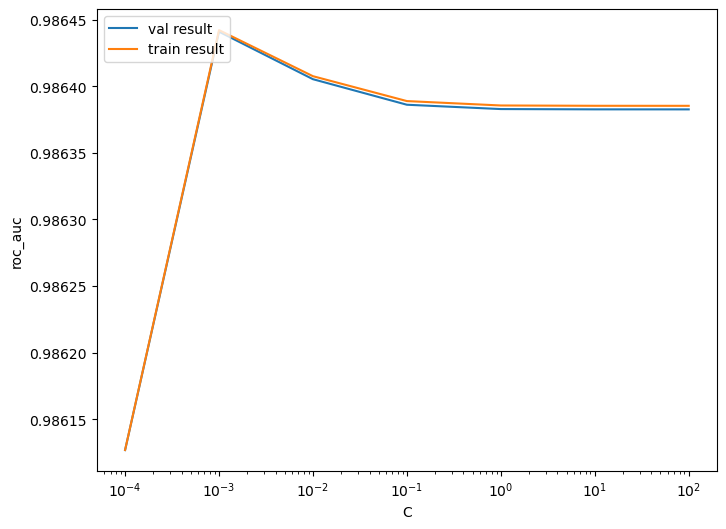

In [52]:
# plot of C versus train and validation scores
plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['val result', 'train result'], loc='upper left')
plt.xscale('log')

In [53]:
logreg = LogisticRegression(C=best_C)
oversampled_best_logistic_model_v2 = logreg.fit(X_train, y_train)
y_train_pred = oversampled_best_logistic_model_v2.predict(X_train)

In [54]:
confusion = confusion_matrix(y_train, y_train_pred)
print(confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

[[214946   6596]
 [ 21766 205685]]


In [55]:
# Best score with best C
best_score = grid_log_reg.best_score_
best_C = grid_log_reg.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.986440870734768 at C = 0.001


In [56]:
# Sensitivity
print("Sensitivity(Recall):", recall_score(y_train, y_train_pred))

# Percision
print("Percision:", precision_score(y_train, y_train_pred))

# F1 score
print("F1-Score:", f1_score(y_train, y_train_pred))

# Accuracy
print("Accuracy:", accuracy_score(y_train, y_train_pred))

# Specificity
print("Specificity:", TN / float(TN+FP))

# classification_report
print(classification_report(y_train, y_train_pred))

Sensitivity(Recall): 0.9043046634220118
Percision: 0.9689279775392051
F1-Score: 0.9355016237162636
Accuracy: 0.9368319773359496
Specificity: 0.9702268644320264
              precision    recall  f1-score   support

           0       0.91      0.97      0.94    221542
           1       0.97      0.90      0.94    227451

    accuracy                           0.94    448993
   macro avg       0.94      0.94      0.94    448993
weighted avg       0.94      0.94      0.94    448993



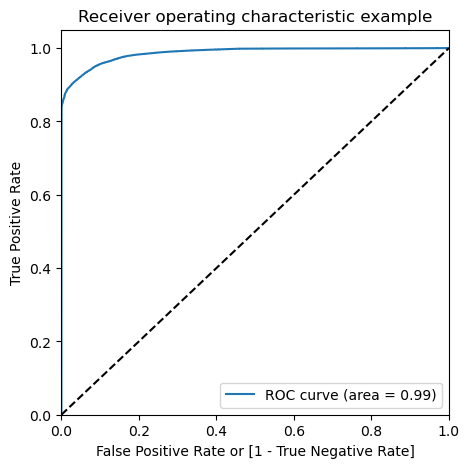

In [57]:
# Predicted probability
y_train_pred_proba = oversampled_best_logistic_model_v2.predict_proba(X_train)[:,1]
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

In [58]:
# Define scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

# Perform cross-validation
cv_results = cross_validate(oversampled_best_logistic_model_v2, X_train, y_train, cv=N_SPLITS, scoring=scoring)

# Display average of each metric
for metric, scores in cv_results.items():
    if "test" in metric:
        print(f"{metric}: {scores.mean():.4f}")

test_accuracy: 0.9369
test_precision: 0.9690
test_recall: 0.9043
test_f1: 0.9355
test_roc_auc: 0.9864
